<a href="https://colab.research.google.com/github/PauSanchoBeneyto/Mercadona_Pontia/blob/main/Limpieza_datos_Carrefour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [74]:
# cargamos los datos desde nuestro disco local, donde se encuentra el CSV con el dataset de Carrefour.

df_datos_carrefour=pd.read_csv("/content/Carrefour_categorizado.csv")

In [75]:
#Realizamos un vistazo previo a los datos que contiene el dataset scrappeado de Carrefour.
df_datos_carrefour.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,precio_oferta,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,NaN,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,NaN,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,NaN,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,NaN,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,NaN,Carne


In [76]:
#Comprobamos con el metodo shape cuantos registro y columnas tiene el dataset

df_datos_carrefour.shape

(13989, 7)

In [77]:
#con el metodo .info() identificamos por cada campo cuantos cuantos datos no son nulos

df_datos_carrefour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre               13986 non-null  object
 1   Precios              13989 non-null  object
 2   Precios_unit         13678 non-null  object
 3   categorias           13989 non-null  object
 4   subcategoria         13989 non-null  object
 5   precio_oferta        311 non-null    object
 6   Categoria_principal  13749 non-null  object
dtypes: object(7)
memory usage: 765.1+ KB


In [78]:
#Por medio del metodo .isnull() y .sum() podemos ver la cantidad total de datos nulos tiene cada uno de los campos del dataset

df_datos_carrefour.isnull().sum()

nombre                     3
Precios                    0
Precios_unit             311
categorias                 0
subcategoria               0
precio_oferta          13678
Categoria_principal      240
dtype: int64

In [79]:
# Habiendo comprobado la cantidad de de nulos que tenemos en el dataset por cada campo, queremos ver que porcentage de peso tienen los nulos de cada campo con respecto al total de registros que tiene el dataset.

(((df_datos_carrefour.isnull().mean()) * 100).round(2))


nombre                  0.02
Precios                 0.00
Precios_unit            2.22
categorias              0.00
subcategoria            0.00
precio_oferta          97.78
Categoria_principal     1.72
dtype: float64



*   Como se puede apreciar la variable de precio_oferta contiene un 97,78% del total de registros sin ningun tipo de dato, por lo que será una variable que no se tendrá en cuenta para el analisis ya que no nos aporta nada de información.



In [80]:
# Continuamos tratando los datos y comprobando este vez los datos duplicados que podamos encontrar en nuestro dataset.

df_datos_carrefour.drop_duplicates()

,nombre,Precios,Precios_unit,categorias,subcategoria,precio_oferta,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,NaN,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,NaN,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,NaN,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,NaN,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,NaN,Carne
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,"37,50 €",NaN,mascotas,perros,"35,95 €",Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,"21,07 €",NaN,parafarmacia,bebe,"17,77 €",Bebé
13986,Cepillo de dientes medio PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,"5,95 €",Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,"6,69 €",NaN,parafarmacia,higiene-bucal,"5,95 €",Cuidado facial y corporal


# TRANSFORMACION DE DATOS Y TRATAMIENTO DE VALORES NULOS


In [81]:
# Habiendo comporbado anteriormente que la variable precio_oferta nos ofrece muy poca información para nuestro analisis, procedemos a eliminar dicho campo de nuestro dataset.

df_cf_limpieza = df_datos_carrefour.drop("precio_oferta", axis=1)

df_cf_limpieza.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos-frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos-frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos-frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos-frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos-frescos,carniceria,Carne


In [82]:
# Una vez eliminado el campo de precio_oferta, coninuamos con nuestra trnasformacion de datos para poder seguir trtando los valores nulos.
# Primero comprobamos el tipo de datos de que tenemos en el dataset.

df_cf_limpieza.dtypes

nombre                 object
Precios                object
Precios_unit           object
categorias             object
subcategoria           object
Categoria_principal    object
dtype: object

In [83]:
#Las columnas de categorias y subcategorias, pertencecen a las estipuladas por Carrefour para los productos de supermercado. Como nosotros necesitamos tener un database conjunto en el que unifiquemos de forma homogenea los campos
# que vamos a necesitar para el análisis, hemos asignado todos los productos de cada supermercado tanto de mercadona como los de la competencia a las mismas categorias que Mercadona, para poder tener los datos homogeneos.
# Por lo que usaremos la columna de Categoria principal, la cual hace referencia a las categorias de Mercadona pero asignadas a cada producto de Carrfour. Por ello comenzaremos limpiando la columna de Categorias princiaples de posibles datos erroneos.

df_cf_limpieza["Categoria_principal"].isnull().sum()


240

Como hemos podido comprobar antes usando el isnull, vemos que existen 240 datos NaN, dentro de este campo, por revisaremos a que puede ser debido.

In [84]:
# Para ello vamos a obtener una Serie booleana donde True significa que el valor es NaN en la columna 'Categoria_principal', de esta manera veramos que filas contienen datos vacios dicha columna.

nombre_isnull_cat_prin = df_cf_limpieza['Categoria_principal'].isnull()
filas_con_nan_en_cat_prin = df_cf_limpieza[nombre_isnull_cat_prin]

filas_con_nan_en_cat_prin

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8924,Detergente líquido jabón de marsella y flor de...,"4,95 €","0,07 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8925,Detergente en polvo con jabón de Marsella Carr...,"12,35 €","0,12 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8926,Quitamanchas del día a día para la ropa 4 en 1...,"4,39 €","5,85 €/l",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8927,Detergente líquido jazmín fresco y lavanda sil...,"14,45 €","0,41 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
8928,Detergente líquido coladas mixtas limpia y pro...,"17,09 €","0,33 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
...,...,...,...,...,...,...
9159,Perfume para la ropa en perlas concentrado fre...,"9,25 €","32,46 €/kg",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9160,Detergente líquido limpieza profunda Skip 45 l...,"17,09 €","0,38 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9161,Detergente líquido Optimal Clean Carrefour Exp...,"10,09 €","0,12 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN
9162,Antical para lavadora en pastillas classic pro...,"3,25 €","0,08 €/lavado",limpieza-y-hogar,cuidado-de-la-ropa,NaN


Si utilizamos la columna de categorias de Carrefour podemos ver que la mayoria de productos que les falta ser asignados a una categoria de las de Mercadona son los productos de Limpieza y hogar. Por ello procederemos a asignarles a los NaN la categoria_principal de Limpieza y Hogar.

In [85]:
df_cf_limpieza['Categoria_principal'] = df_cf_limpieza['Categoria_principal'].fillna('Limpieza y hogar')

In [86]:
df_cf_limpieza.isnull().sum()

nombre                   3
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [87]:
# Durante el proceso de homogeneización de las categorias, se detecto un pqueño error en la asignación de alguna de la categoria Zumos de Mercadona a algunos productos que deberian estar en la categoria 'Agua y refrescos',
# por lo que reasignaremos dichos productos a las categorias pertinentes.

palabras_filtro = ['Agua', 'fanta', 'Sprite', 'Bebida']

filtro_cat_prin = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro), case=False)

df_cf_limpieza.loc[filtro_cat_prin & (df_cf_limpieza['Categoria_principal'] == 'Zumos'), 'Categoria_principal'] = 'Agua y refrescos'

In [88]:
df_cf_limpieza.isnull().sum()

nombre                   3
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [89]:
palabras_filtro_2 = ['Mosto']

filtro_cat_prin_bodega = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_2), case=False)

df_cf_limpieza.loc[filtro_cat_prin_bodega & (df_cf_limpieza['Categoria_principal'] == 'Zumos'), 'Categoria_principal'] = 'Bodega'

In [91]:
palabras_filtro_3 = ['Té']

filtro_cat_prin_cafe_infusion = df_cf_limpieza['nombre'].str.contains('|'.join(palabras_filtro_3), case=False)

df_cf_limpieza.loc[filtro_cat_prin_cafe_infusion & (df_cf_limpieza['Categoria_principal'] == 'Zumos'), 'Categoria_principal'] = 'Cacao, café e infusiones'

In [94]:
#Realizamos una comprobación para ver si el codigo llevado a cabo ha funcionado.

df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Agua mineral Lanjarón tapón deportivo 75 cl.']


,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8143,Agua mineral Lanjarón tapón deportivo 75 cl.,"0,99 €","1,32 €/l",bebidas,aguas-y-zumos,Agua y refrescos


In [95]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Mosto Carrefour blanco botella 1 l.']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8299,Mosto Carrefour blanco botella 1 l.,"2,29 €","2,29 €/l",bebidas,aguas-y-zumos,Bodega


In [96]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Té sabor melocotón y hibisco Fuze Tea 400 ml.']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
8231,Té sabor melocotón y hibisco Fuze Tea 400 ml.,"1,66 €","4,15 €/l",bebidas,aguas-y-zumos,"Cacao, café e infusiones"


In [97]:
# Habiendo corregido y limpiado los posibles errores del campo 'Categoria_principal', nos disponemos a comprobar cual es el estado del campo 'nombre, otra de nuestras variables catgórica.
# Como hemos visto por medio del metodo isnull, esta campo contiene 3 datos nulos. Al ser un nombre de producto que para nuestro análisis, no tiene un peso importante,
# y tampoco es un dato que podamos avergiguar cual es, con alguno de los campos de información que disponemos, procedemos asignarle el nombre 'Desconocido' a esos tres productos.

df_cf_limpieza['nombre'] = df_cf_limpieza['nombre'].fillna('Desconocido')

In [98]:
df_cf_limpieza.isnull().sum()

nombre                   0
Precios                  0
Precios_unit           311
categorias               0
subcategoria             0
Categoria_principal      0
dtype: int64

In [99]:
df_cf_limpieza.loc[df_cf_limpieza['nombre'] == 'Desconocido']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
7273,Desconocido,"2,09 €",55 €/kg,la-despensa,aperitivos,Aperitivos
12745,Desconocido,"37,50 €","2,50 €/kg",mascotas,perros,Mascotas
12778,Desconocido,"12,99 €","1,30 €/kg",mascotas,perros,Mascotas


In [100]:
df_cf_limpieza['categorias'] = df_cf_limpieza['categorias'].str.replace('-', ' ')

In [101]:
df_cf_limpieza['subcategoria'] = df_cf_limpieza['subcategoria'].str.replace('-', ' ')

In [102]:
df_cf_limpieza.head()

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71 €","7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81 €","7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39 €","24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50 €","18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79 €","13,59 €/kg",productos frescos,carniceria,Carne


In [103]:
# Una vez limpiados los campos de variables de tipo categórico nos centraremos en los campos de precios, los cuales son variables de tipo float.
# Para ello primero revisamos que tipos de variables muestra nuestro dataset de Carrefour.

df_cf_limpieza.dtypes

nombre                 object
Precios                object
Precios_unit           object
categorias             object
subcategoria           object
Categoria_principal    object
dtype: object

Como podemos ver todas las variables del dataset son de tipo categoricas, es decir de formato string, por lo que necesitamos cambiar el tipo de variable de los precios a float.

In [104]:
# Abordaaremos primero la columna de precios.
# Para ello necesitamos eliminar ciertos caracteres extraños como el simbolo del € y el KG.

df_cf_limpieza["Precios"] = df_cf_limpieza["Precios"].apply(lambda x: x.strip('€'))
df_cf_limpieza["Precios"] = df_cf_limpieza["Precios"].str.strip()
df_cf_limpieza


,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,"6,71","7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,"5,81","7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,"12,39","24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,"4,50","18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,"6,79","13,59 €/kg",productos frescos,carniceria,Carne
...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,"37,50",NaN,mascotas,perros,Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,"21,07",NaN,parafarmacia,bebe,Bebé
13986,Cepillo de dientes medio PHB 2 ud.,"6,69",NaN,parafarmacia,higiene bucal,Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,"6,69",NaN,parafarmacia,higiene bucal,Cuidado facial y corporal


Como podemos ver, hemos conseguido quitar de esta forma los caracteres extraños que impiden poder transformar la variable Precio en una variable numérica.

In [105]:
# Como en Phyton el separador de decimales debe ser "." y no la "," debemos modificar esto antes para poder cambiar el tipo de variable.

df_cf_limpieza["Precios"] = df_cf_limpieza["Precios"].str.replace(',', '.').str.strip().astype(float)
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne
...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal


In [106]:
df_cf_limpieza_copia = df_cf_limpieza.copy()

In [107]:
df_cf_limpieza_copia.head(3)

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne


In [127]:
fila_maxima = df_cf_limpieza_copia.loc[df_cf_limpieza_copia['Precios']==14.19]
fila_maxima

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal
2253,Azafrán de la Mancha en hebras De Nuestra Tier...,14.19,1419 €/100g,la despensa,alimentacion,"Salsas, pasta y refrescos"
2635,"Harina de avena integral instantánea Weider 1,...",14.19,"7,47 €/kg",la despensa,alimentacion,"Salsas, pasta y refrescos"
10419,Agua de colonia Indómito Poseidon 150 ml.,14.19,"9,46 €/100ml",perfumeria e higiene,bano e higiene corporal,Cuidado facial y corporal
10501,Agua de colonia Hombre Poseidon 150 ml.,14.19,"9,46 €/100ml",perfumeria e higiene,bano e higiene corporal,Cuidado facial y corporal
13315,Gel dermo relajante de piernas Actidren E'life...,14.19,"7,09 €/100ml",parafarmacia,cuidado corporal,Cuidado facial y corporal
13317,Emulsión dermo reductora y reafirmante Vientre...,14.19,"7,09 €/100ml",parafarmacia,cuidado corporal,Cuidado facial y corporal
13318,Emulsión dermo tensora y reductora Minucell E'...,14.19,"7,09 €/100ml",parafarmacia,cuidado corporal,Cuidado facial y corporal
13355,Crema forte facial Atopicontrol Eucerin 50 ml.,14.19,"28,38 €/100ml",parafarmacia,cuidado corporal,Cuidado facial y corporal
13358,Gel Intimo+toallitas regalo Lactacyd 400 ml.,14.19,"3,55 €/100ml",parafarmacia,cuidado corporal,Cuidado facial y corporal
13572,Complemento alimenticio Energy Extra Supradyn ...,14.19,"35,47 €/100g",parafarmacia,nutricion y dietetica,Fitoterapia y parafarmacia


In [108]:
# Antes de quitarle los caracteres extraños como los simbolos '€' y las unidades de medida para poder transformar la variable Precios_unit a float para poder realizar el análisis,
# los extraemos y los recolocamos en un nuevo campo que nos servirá para conformar el nuevo dataset general con todos los datos de los supermercados.

df_cf_limpieza['Unidad de referencia'] = df_cf_limpieza['Precios_unit'].str.extract(r'(\€/\w+)')
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,NaN
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,NaN
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,NaN
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,NaN


In [109]:
df_cf_limpieza['Unidad de referencia'] = df_cf_limpieza['Unidad de referencia'].fillna('No especificado')

In [110]:
df_cf_limpieza.loc[df_cf_limpieza['Unidad de referencia'] == 'No especificado']

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
13678,Preparado de carne picada de vacuno Calidad y ...,4.59,NaN,productos frescos,carniceria,Carne,No especificado
13679,Pechuga de pollo fileteada 1 kg aprox,7.29,NaN,productos frescos,carniceria,Carne,No especificado
13680,Alas de pollo adobadas partidas Carrefour 550 ...,2.35,NaN,productos frescos,carniceria,Carne,No especificado
13681,"Trozo de lomo de cerdo Carrefour 1,2 kg aprox",6.35,NaN,productos frescos,carniceria,Carne,No especificado
13682,Entrecot de añojo Calidad y Origen Carrefour 5...,10.62,NaN,productos frescos,carniceria,Carne,No especificado
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [111]:
df_cf_limpieza["Precios_unit"].fillna(0, inplace=True)

In [112]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46 €/kg",productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,"7,75 €/kg",productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79 €/kg",productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75 €/kg",productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59 €/kg",productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,0,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,0,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,0,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,0,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [113]:
df_cf_limpieza['Precios_unit'] = df_cf_limpieza['Precios_unit'].str.replace('[^0-9.,]', '', regex=True)

In [114]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,"7,46",productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,"7,75",productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,"24,79",productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,"18,75",productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,"13,59",productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [115]:
df_cf_limpieza["Precios_unit"] = df_cf_limpieza["Precios_unit"].str.replace('.', '')

In [116]:
df_cf_limpieza["Precios_unit"] = df_cf_limpieza["Precios_unit"].str.replace(',', '.')

In [117]:
df_cf_limpieza["Precios_unit"]= df_cf_limpieza["Precios_unit"].astype(float)

In [118]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,7.46,productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,7.75,productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,24.79,productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,18.75,productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,13.59,productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [119]:
valor_maximo = df_cf_limpieza["Precios_unit"].max()

In [72]:
valor_maximo

1419100.0

In [123]:
indice_maximo = df_cf_limpieza["Precios_unit"].idxmax()

# Mostrar toda la fila que contiene el valor máximo
fila_maxima = df_cf_limpieza.loc[indice_maximo]

In [157]:
filtrado = df_cf_limpieza[(df_cf_limpieza["Precios_unit"] >= 500) & (df_cf_limpieza["Precios_unit"] <= 100000000)]

In [158]:
unicos=filtrado["categorias"].unique()

In [159]:
unicos

array(['productos frescos', 'la despensa', 'limpieza y hogar',
       'perfumeria e higiene', 'parafarmacia'], dtype=object)

In [124]:
fila_maxima

nombre                  Azafrán de la Mancha en hebras De Nuestra Tier...
Precios                                                             14.19
Precios_unit                                                    1419100.0
categorias                                                    la despensa
subcategoria                                                 alimentacion
Categoria_principal                             Salsas, pasta y refrescos
Unidad de referencia                                               €/100g
Name: 2253, dtype: object

In [ ]:
df_cf_limpieza["Precios_unit"].fillna(0, inplace=True)

In [ ]:
df_cf_limpieza["Precios_unit"].round(2)

0         7.46
1         7.75
2        24.79
3        18.75
4        13.59
         ...  
13984     0.00
13985     0.00
13986     0.00
13987     0.00
13988     0.00
Name: Precios_unit, Length: 13989, dtype: float64

In [160]:
df_cf_limpieza

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Preparado de carne picada de vacuno Carrefour ...,6.71,7.46,productos frescos,carniceria,Carne,€/kg
1,Solomillo de pavo 750 g aprox,5.81,7.75,productos frescos,carniceria,Carne,€/kg
2,Pechuga de Pollo Ecológica Carrefour Bio 500 g...,12.39,24.79,productos frescos,carniceria,Carne,€/kg
3,Hamburguesas de vacuno ecológica Carrefour Bio...,4.50,18.75,productos frescos,carniceria,Carne,€/kg
4,Jamoncito de pollo ecológico Carrefour Bio 500...,6.79,13.59,productos frescos,carniceria,Carne,€/kg
...,...,...,...,...,...,...,...
13984,Pienso de pollo y verduras para perro adulto P...,37.50,NaN,mascotas,perros,Mascotas,No especificado
13985,Pomada para proteger la zona del pañal Mitosyl...,21.07,NaN,parafarmacia,bebe,Bebé,No especificado
13986,Cepillo de dientes medio PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado
13987,Cepillo dental suave PHB 2 ud.,6.69,NaN,parafarmacia,higiene bucal,Cuidado facial y corporal,No especificado


In [175]:
df_cf_limpieza.loc[df_cf_limpieza["Precios_unit"] > 500, 'Precios_unit'] = np.nan

In [176]:
df_cf_limpieza.dtypes

nombre                   object
Precios                 float64
Precios_unit            float64
categorias               object
subcategoria             object
Categoria_principal      object
Unidad de referencia     object
tercera_columna         float64
dtype: object

In [177]:
# Teniendo los campos del dataset formateados con los tipos de variables correctos, podemos realizar un analisis estadistico preliminar de las variables numércias
# Usando el método "describe", podemos ver los datos estadísticos descriptivos de las variables transformadas en float.

df_cf_limpieza["Precios_unit"].describe().round(2)

count    13630.00
mean        13.91
std         22.17
min          0.01
25%          2.89
50%          7.80
75%         16.30
max        467.44
Name: Precios_unit, dtype: float64

De esta manera comprobamos que no existe ningun NaN en la columna de "Precios". La media de precios de los articulos de Carrefour ronda los 5,85€, mientras que gracias a los cuartiles podemos comprobar que el 75% del total de los precios de los articulos de Carrefour es de 5.99€ o inferior, por lo que nos hace pensar que si el valor MAX=439€ pude haber un error o existe algún outlier en este campo.

In [178]:
#Para poder comprobar si la desviación estandar es muy grande o no. Calculamos el ratio para sabr como se dispersa la distribución
df_cf_limpieza["Precios"].std()/df_cf_limpieza["Precios"].mean()

1.721827588598702

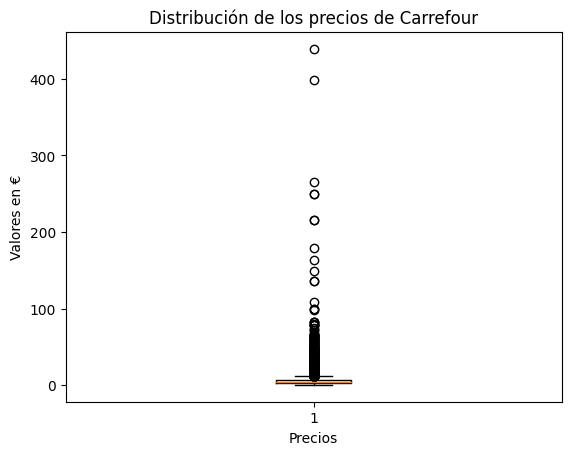

In [183]:
# Usamos un boxplot para poder ver la dispersión de la variable Precios.
plt.boxplot(df_cf_limpieza["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()


Como podemos ver existen muchos valores atípicos que no podemos pasar por alto.

In [185]:
print("Diferencias percentiles de la distribución de los precios")
df_cf_limpieza["Precios_unit"].quantile([0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999])

Diferencias percentiles de la distribución de los precios


0.1000      0.910000
0.2500      2.890000
0.5000      7.800000
0.7500     16.297500
0.9000     30.400000
0.9500     46.711000
0.9900     97.954400
0.9990    255.000000
0.9999    426.835113
Name: Precios_unit, dtype: float64

<Axes: >

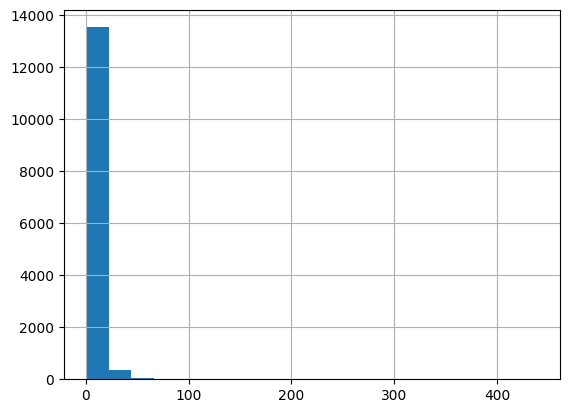

In [186]:
df_cf_limpieza["Precios"].hist(bins=20)

Para corroborar la informacion extraida del boxplot, usando un histograma podemos confirmar que la distribución de la variable Precios, es asimétrica

In [187]:
# Si importamos scipy, podemos calcular una media más robusta.
from scipy.stats import trim_mean

print("Media truncada")
round(trim_mean(df_cf_limpieza["Precios"],0.05),2)

Media truncada


4.61

In [188]:
IQR = (df_cf_limpieza["Precios"].quantile(0.75) - df_cf_limpieza["Precios"].quantile(0.25)).round(2)

print(IQR)

inferior = (df_cf_limpieza["Precios"].quantile(0.75) - 3*IQR).round(2)
superior = (df_cf_limpieza["Precios"].quantile(0.75) + 3*IQR).round(2)

print([inferior, superior])


3.84
[-5.53, 17.51]


El rango intercuartil es de 3.84, mientras que el limite para los valores atípicos, es de -5.53 y 17.51. Esto significa que cualquier valor de precio por debajo de -5.53 o por encima de 17.51 se consideraría un valor atípico.

Sin embargo, en nuestro caso, dado que estamos trabajando los precios de productos de supermercado, no tiene sentido tener un precio negativo. Por lo tanto, consideraremos solo el límite superior para determinar los valores atípicos. Para ello , procedermos a dividar nuestro dataset en dos, filtrandolo por los productos con precios menores a 17.51€ (precios_bajos) y los productos con precios superiores a 17.51€ (precios_altos).

De esta manera como la mayoria de los productos de carrefour estan incluidos en nuestro nuevo dataset de precio_bajos y el resto de supermercados se hallan en la mism situación, se ha tomado la decisión de tomar tan solo este dataset para incluirlo en nuestro analisis general de todos los supermercados, proporcionandonos de esta manera un mejor analisis y una mayor estracción de información y conclusiones de nuestras hipótesis.

In [189]:
# Procedemos de este modo a dividir los datos en dos dataframes de la siguiente manera:

df__cf_precios_altos = df_cf_limpieza[df_cf_limpieza["Precios"] > 17.51]
df_cf_precios_bajos = df_cf_limpieza[df_cf_limpieza["Precios"] <= 17.51]


In [190]:
df_cf_precios_bajos = df_cf_precios_bajos.sort_values("Precios", ascending=False)
df_cf_precios_bajos

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia,tercera_columna
351,Merluza en filete 1 kg aprox,17.50,17.50,productos frescos,pescaderia,Marisco y pescado,€/kg,NaN
13229,Parches térmicos terapéuticos para dolor de cu...,17.49,2.91,parafarmacia,botiquin,botiquin,€/ud,NaN
8890,Crema de whisky Baileys salted caramel 70 cl.,17.49,24.99,bebidas,licores y cremas,Bodega,€/l,NaN
11946,Maquinilla ProGlide Power Gillette 1 ud.,17.49,17.49,perfumeria e higiene,depilacion y afeitado,Cuidado facial y corporal,€/ud,NaN
10132,Rotuladores 20 ud Punta Fina STABILO Point 88 ...,17.49,17.49,limpieza y hogar,papeleria,papeleria,€/ud,NaN
...,...,...,...,...,...,...,...,...
8420,"Agua mineral Font Natura 1,5 l.",0.25,0.17,bebidas,aguas y zumos,Agua y refrescos,€/l,NaN
8294,Agua mineral Carrefour Kids tapón deportivo 33...,0.24,0.73,bebidas,aguas y zumos,Agua y refrescos,€/l,NaN
8422,"Agua mineral Font Natura 0,5 l.",0.22,0.44,bebidas,aguas y zumos,Agua y refrescos,€/l,NaN
8289,Agua mineral Fuente Primavera 50 cl.,0.22,0.44,bebidas,aguas y zumos,Agua y refrescos,€/l,NaN


In [191]:
df_cf_precios_bajos.shape

(13257, 8)

In [192]:
df_cf_precios_bajos.describe().round(2)

,Precios,Precios_unit,tercera_columna
count,13257.00,12958.00,0.0
mean,4.38,13.06,NaN
std,3.40,20.15,NaN
min,0.21,0.01,NaN
25%,2.06,2.87,NaN
50%,3.25,7.55,NaN
75%,5.39,15.40,NaN
max,17.50,399.44,NaN


<Axes: >

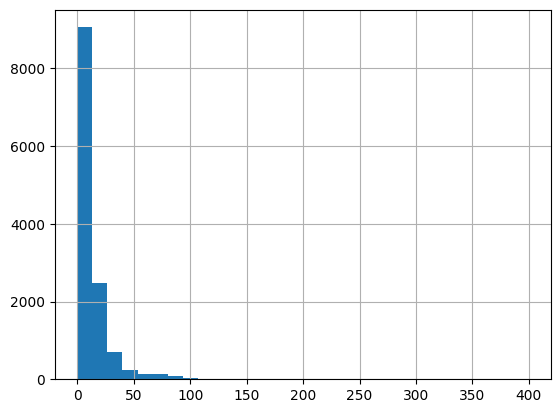

In [194]:
df_cf_precios_bajos["Precios_unit"].hist(bins=30)

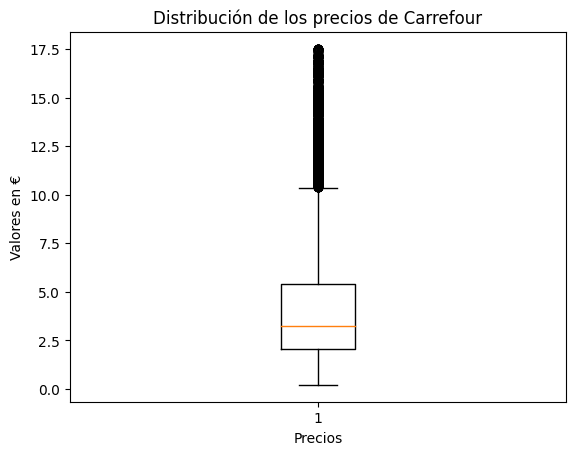

In [195]:
plt.boxplot(df_cf_precios_bajos["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

In [196]:
df__cf_precios_altos = df__cf_precios_altos.sort_values("Precios", ascending=False)
df__cf_precios_altos

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia,tercera_columna
993,Jamón de Bellota Ibérico 100% Raza Ibérica Sán...,439.00,67.540,productos frescos,charcuteria,Charcutería y quesos,€/kg,NaN
1014,Jamón de bellota ibérico curado 100% raza ibér...,399.00,57.000,productos frescos,charcuteria,Charcutería y quesos,€/kg,NaN
1037,Jamón de Bellota Ibérico 50% Raza Ibérica Iber...,265.00,35.330,productos frescos,charcuteria,Charcutería y quesos,€/kg,NaN
1013,Jamón de Bellota Ibérico 50% Raza Ibérica Nobl...,249.00,35.570,productos frescos,charcuteria,Charcutería y quesos,€/kg,NaN
1042,Paleta de Bellota Ibérica 100% Raza Ibérica Ci...,249.00,52.420,productos frescos,charcuteria,Charcutería y quesos,€/kg,NaN
...,...,...,...,...,...,...,...,...
13495,Champú de cebolla Nuggela&Sulé 250 ml.,17.59,7.041,parafarmacia,cabello,Cuidado del cabello,€/100ml,NaN
11194,Spray protector solar protección invisible SPF...,17.59,8.791,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,€/100ml,NaN
8688,Viña Mayor Vendimia Seleccionada Tinto 2018,17.59,17.590,bebidas,vinos,Bodega,€/ud,NaN
11172,Spray protector solar FP50 Protege & Refresca ...,17.59,8.791,perfumeria e higiene,cuidado y proteccion corporal,Cuidado facial y corporal,€/100ml,NaN


In [197]:
df__cf_precios_altos.shape

(732, 8)

In [198]:
df__cf_precios_altos.describe().round(2)

,Precios,Precios_unit,tercera_columna
count,732.00,672.00,0.0
mean,32.38,30.34,NaN
std,31.41,43.12,NaN
min,17.55,0.08,NaN
25%,20.80,4.74,NaN
50%,24.40,21.70,NaN
75%,33.70,38.99,NaN
max,439.00,467.44,NaN


<Axes: >

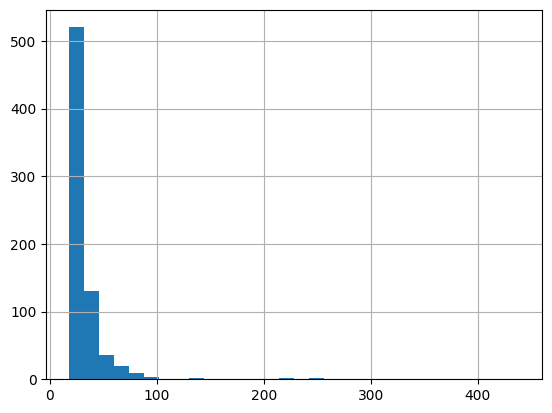

In [199]:
df__cf_precios_altos["Precios"].hist(bins=30)

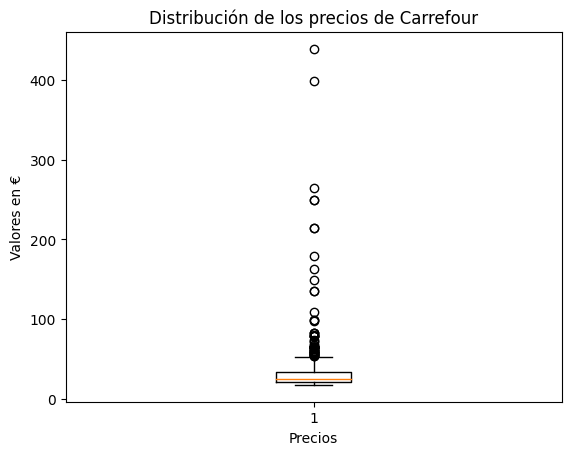

In [200]:
plt.boxplot(df__cf_precios_altos["Precios"])
plt.xlabel("Precios")
plt.ylabel("Valores en €")
plt.title("Distribución de los precios de Carrefour")
plt.show()

In [201]:
df_cf_precios_bajos.to_csv(r"Carrefour_limpio_14-06-2024.csv",index=False)